In [3]:
import numpy as np
import pandas as pd 

In [4]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [5]:
df.sample(10)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5190,spam,Our records indicate u maybe entitled to 5000 ...,NaN,NaN,NaN
325,ham,No calls..messages..missed calls,NaN,NaN,NaN
5538,ham,I can't believe how attached I am to seeing yo...,NaN,NaN,NaN
1374,spam,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA...",NaN,NaN,NaN
4620,ham,"Received, understood n acted upon!",NaN,NaN,NaN
5403,ham,So gd got free ice cream... I oso wan...,NaN,NaN,NaN
187,spam,Please call our customer service representativ...,NaN,NaN,NaN
3576,ham,Yeah confirmed for you staying at that weekend,NaN,NaN,NaN
3573,ham,Yeah sure I'll leave in a min,NaN,NaN,NaN
3351,ham,Call him and say you not coming today ok and t...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
# PROJECT FLOW
# 1. Data cleaning 
# 2. EDA
# 3. Text preproccessing 
# 4. model building
# 5. model evaluation 
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# Drop last Three columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [11]:
df.sample(5)

,v1,v2
5332,ham,I think steyn surely get one wicket:)
2367,ham,V nice! Off 2 sheffield tom 2 air my opinions ...
2028,ham,Kallis is ready for bat in 2nd innings
1726,ham,\ALRITE HUNNY!WOT U UP 2 2NITE? DIDNT END UP G...
432,spam,Congrats! Nokia 3650 video camera phone is you...


In [12]:
# Reanming the column 
df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
1181,ham,You flippin your shit yet?
1511,ham,Oops sorry. Just to check that you don't mind ...
4837,ham,All boys made fun of me today. Ok i have no pr...
3257,ham,He fucking chickened out. He messaged me he wo...
3687,ham,I'll meet you in the lobby


In [13]:
# convert ham = 0 and spam = 1 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.sample(10)

,target,text
5100,0,"Aight, call me once you're close"
3367,0,"Hey elaine, is today's meeting still on?"
2421,0,Err... Cud do. I'm going to at 8pm. I haven't...
5372,0,"Ok., is any problem to u frm him? Wats matter?"
2389,0,Boo. How's things? I'm back at home and a litt...
479,0,When're you guys getting back? G said you were...
3927,0,Babe ? I lost you ... Will you try rebooting ?
119,1,PRIVATE! Your 2004 Account Statement for 07742...
5541,0,Yeah it's jus rite...
4607,0,We live in the next &lt;#&gt; mins


In [16]:
# missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# chek for dubplicate value
df.duplicated().sum()

403

In [18]:
# drop duplicate
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

## 2. EDA

In [22]:
# to chek ham and spam datapoint in dataframe
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

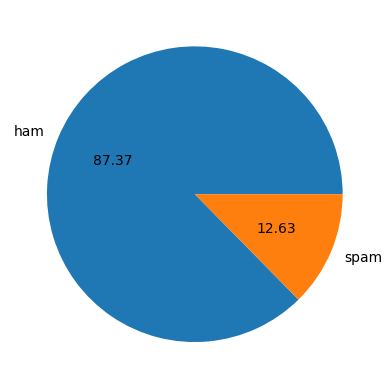

In [23]:
# ham and spam plot in pie chart for view 
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [24]:
# now we will chek 3 major point in dataset [part of nlp]
# 1 . how many  charcter available in text column  
# 2 .  how many number of word avlaible in text column  
# 3  . how many number of sentence avlaible in text column  

In [25]:
import nltk 

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\sar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
# 1 .how many  charcter available in text colum

df['num_characters'] = df['text'].apply(len)

In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# 2 .  how many number of words avlaible in text column  
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
# 3  . how many number of sentence avlaible in text column  
df['num_sentances'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_characters',	'num_words',	'num_sentances']].describe()

,num_characters,num_words,num_sentances
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# we can check ham and spam saperatly as well

# for ham 
df[df['target'] == 0][['num_characters',	'num_words',	'num_sentances']].describe()

,num_characters,num_words,num_sentances
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# for spam
df[df['target'] == 1][['num_characters',	'num_words',	'num_sentances']].describe()

,num_characters,num_words,num_sentances
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
# we can  also chek in visualization form 

import seaborn as sns 

<Axes: xlabel='num_characters', ylabel='Count'>

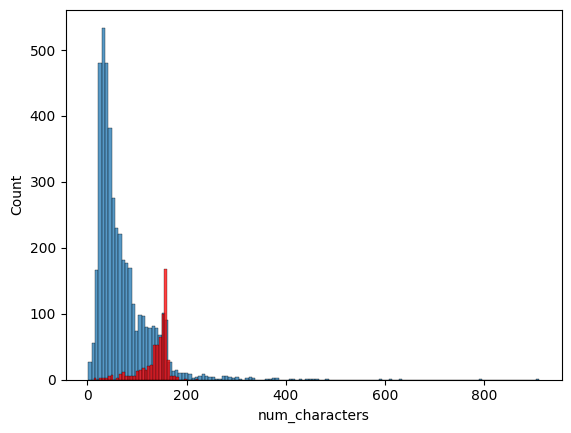

In [37]:
# for character
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')


<Axes: xlabel='num_words', ylabel='Count'>

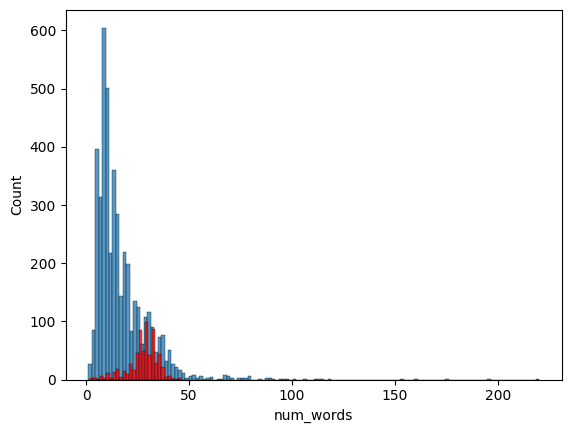

In [38]:
# for words
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color = 'red')


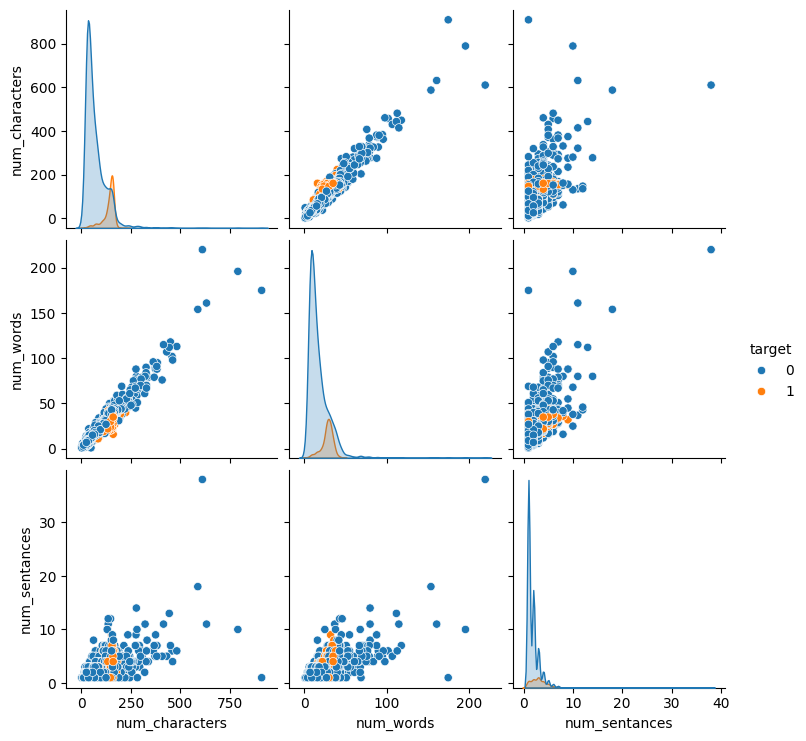

In [39]:
# Yeh poori line ka kaam yeh hai ki aapko ek visual representation mile jismein data ke different categories ko alag rangon me dikhaya jaye, 
# taki aapko variables ke beech ka sambandh har class ke liye alag se samajh me aa sake.
sns.pairplot(df,hue='target')

## Data preprocessing 
#### . Lower case 
#### . Tokenization 
#### . Removing Special char
#### . Removing Stop Word and Punctuation 
#### . stemming 

In [41]:
import nltk
from nltk.corpus import stopwords
import string


In [42]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\sar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
# importing stemmer from nltk for stem the text value 

from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()
ps.stem('dancing')


'danc'

In [44]:
def transform_text(text):
    text = text.lower()  # all corpus change into lowercase 
    text = nltk.word_tokenize(text) #['hii', 'my', 'self', 'sarvesh']

    y = []
    for i in text:     # this loop for removing special charector if input = 'Hii my self sarvesh ##' then o/p will be 'hii', 'my', 'self', 'sarvesh'
        if i.isalnum(): # isalnum = is alpha numeric 
            y.append(i)

    text = y[:]        # y already use hai to agr y ki value text me rakhna hai to clone krna pdta hai 
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [45]:
df['transform_text'] = df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentances,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
from wordcloud import WordCloud
wc = WordCloud(width = 50, height = 50, min_font_size = 10, background_color = 'white')

In [48]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

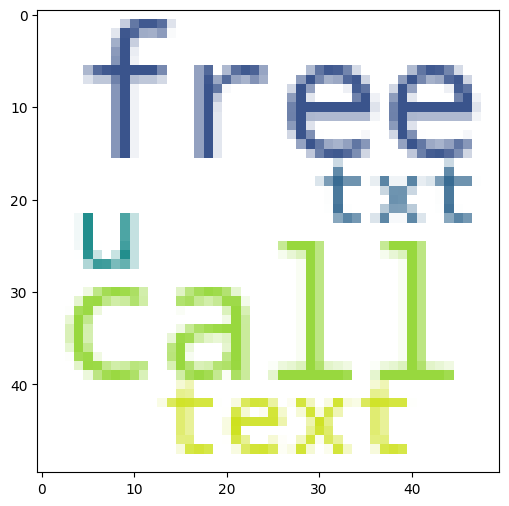

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [50]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))

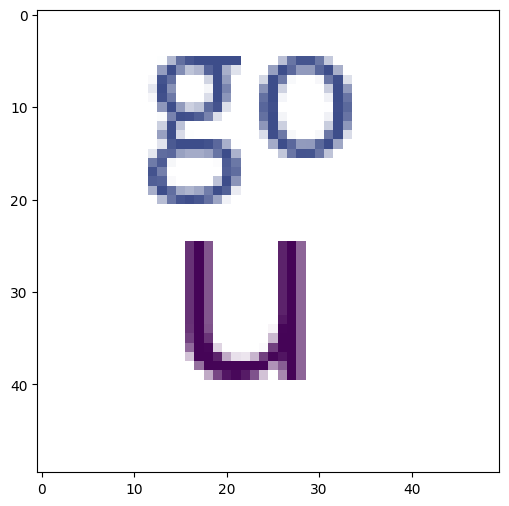

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [52]:
#we can also get top 30 uses word in ham and spam with the help of custome code 

df.head()

,target,text,num_characters,num_words,num_sentances,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9939

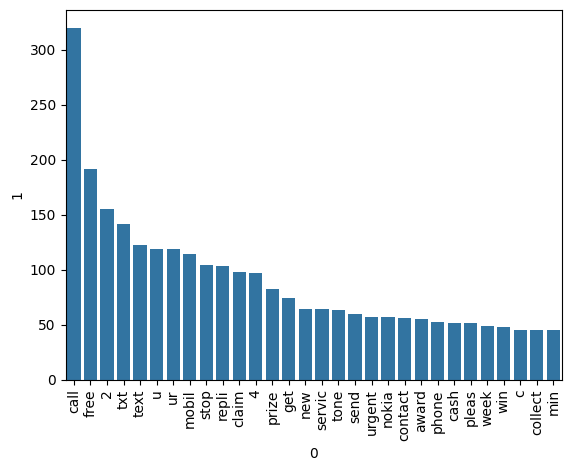

In [55]:
from collections import Counter
counter = Counter(spam_corpus)

# Create a DataFrame for the most common 30 words
words_df = pd.DataFrame(counter.most_common(30))
sns.barplot(x = words_df[0], y = words_df[1])


plt.xticks(rotation=90)
plt.show()


In [56]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

35404

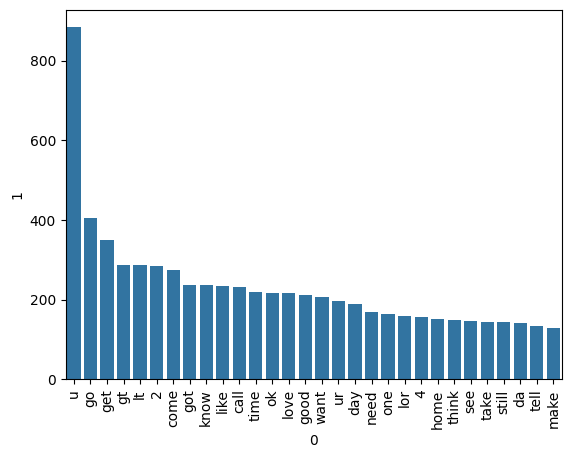

In [58]:
from collections import Counter
counter = Counter(ham_corpus)

# Create a DataFrame for the most common 30 words
words_df = pd.DataFrame(counter.most_common(30))
sns.barplot(x = words_df[0], y = words_df[1])


plt.xticks(rotation=90)
plt.show()

## 4. Model Building 

In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [61]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [62]:
X.shape

(5169, 6708)

In [63]:
y = df['target'].values

In [64]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [67]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [68]:
gnb =  GaussianNB ()
mnb =  MultinomialNB() 
bnb = BernoulliNB()

In [69]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [70]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [71]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [72]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [73]:
pip install scikit-learn==1.4.1


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikit-learn==1.4.1 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21.1, 0.21.2, 0.21.3, 0.22, 0.22.1, 0.22.2.post1, 0.23.0, 0.23.1, 0.23.2, 0.24.0, 0.24.1, 0.24.2, 1.0, 1.0.1, 1.0.2, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.2.0rc1, 1.2.0, 1.2.1, 1.2.2, 1.3.0rc1, 1.3.0, 1.3.1, 1.3.2, 1.4.0rc1, 1.4.0, 1.4.1.post1, 1.4.2, 1.5.0rc1, 1.5.0, 1.5.1, 1.5.2)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for scikit-learn==1.4.1
